In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt
from Bibliography import Bibliography
from GraphScan import GraphScan
from make_bibliography_df import make_bibliography_df

import numpy as np
import os
import glob
import pandas as pd
import ipywidgets as wg
import re

from matplotlib.ticker import MultipleLocator

In [2]:
plt.rcParams.update({"xtick.direction": "in"})
plt.rcParams.update({"ytick.direction": "in"})
plt.rcParams.update({"xtick.top": True})
plt.rcParams.update({"ytick.right": True})

In [3]:
def cont_keyword(df, keyword, column="Carbon type", case=True):
    return df[df[column].astype(str).str.contains(keyword, case)]

def cont_multi_keywords(df, list_of_keywords, column="Carbon type", case=True):
    return df[df[column].astype(str).str.contains("|".join(list_of_keywords), case)]

def excludes_keywords(df, list_of_keywords, column="Carbon type", case=False):
    return df[~df[column].astype(str).str.contains("|".join(list_of_keywords), case)]

In [4]:
thesis_path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())),
                           "Dropbox", "Apps", "Overleaf", "V4_thesis",
                           '3_Host_matrices', 'Figs')

In [5]:
df = make_bibliography_df()

In [6]:
bibliography_list = np.unique([" ".join((name for name in list(df.loc[idx][["First author", "Year", "Optional label"]])))
                               for idx in range(len(df))])

In [7]:
len(bibliography_list)

65

In [8]:
available_data = df.iloc[[idx for idx, values in enumerate(df["Scanned data"]) if len(values)>0]]
available_data = available_data.set_index(np.arange(len(available_data)))

In [9]:
cont_multi_keywords(df, list_of_keywords=["toluene"], column="Sulfur loading method", case=False)

,Binder,Binder content (wt%),Carbon source,Carbon type,Cell type,Conductive additive,Conductive additive content (wt%),E/S ratio (uL/g),Electrode solvent,Electrode thickness,...,Sulfur loading (mg/ cm2),Sulfur loading (wt%),Sulfur loading method,Surface area (cm2/g),Typical pore widths,Year,salt_units,Host label,Scanned data,Sulfur XRD
32,None,0,Commerical graphene oxide,Graphene oxide,CR2032,None,0,30.0,None,300,...,4,70,Toluene + thermal 155 degC 12 hours,21,,2019,M,Graphene oxide,[fig2fig_data\gomez-urbano2019_aerogels\consta...,True
33,None,0,Commerical graphene oxide,Graphene oxide + carbon nanotubes,CR2032,None,0,30.0,None,300,...,4,70,Toluene + thermal 155 degC 12 hours,47,,2019,M,Graphene oxide + carbon nanotubes,[fig2fig_data\gomez-urbano2019_aerogels\consta...,True
34,None,0,Thermally reduced gommerical graphene oxide (7...,Reduced graphene oxide,CR2032,None,0,30.0,None,300,...,4,70,Toluene + thermal 155 degC 12 hours,53,,2019,M,Reduced graphene oxide,[fig2fig_data\gomez-urbano2019_aerogels\consta...,True
136,None,0,CVD,Graphene,,None,0,0.0,None,1600,...,2,52,Solvent (toluene),160,,2014,M,CVD foam 52 wt%,[fig2fig_data\xi2014\constant_3200mAg\line_dat...,False
137,None,0,CVD,Graphene,,None,0,0.0,None,1600,...,,63,Solvent (toluene),160,,2014,M,CVD foam 63 wt%,[],None
138,None,0,CVD,Graphene,,None,0,0.0,None,1600,...,,70,Solvent (toluene),160,,2014,M,CVD foam 70 wt%,[],None
140,PVDF,10,Expanded graphite with FeCl3,Graphene,LIR2032,Super C65,20,0.0,NMP,NaN,...,2,63.8,Solvent (toluene) + thermal 155 degC 12 hours,,,2017,M,Graphene,[fig2fig_data\xu2017_caterpillar\xu2017_1C\lin...,True


In [22]:
df.

Binder                                                                            None
Binder content (wt%)                                                                 0
Carbon source                                                Commerical graphene oxide
Carbon type                                          Graphene oxide + carbon nanotubes
Cell type                                                                       CR2032
Conductive additive                                                               None
Conductive additive content (wt%)                                                    0
E/S ratio (uL/g)                                                                  30.0
Electrode solvent                                                                 None
Electrode thickness                                                                300
Electrolyte salt                                                                LiTFSI
Electrolyte solvent                        

# LiNO$_{3}$

In [25]:
## converting wt% to M
mass_LiNO3 = 68.946 ## g/mol
mass_LiTFSI = 287.09 ## g/mol

density_DOL = 1.06 ## g/cm3
density_DME = 0.868 ## g/cm3

In [37]:
LiNO3 = available_data.loc[(available_data["Electrolyte solvent"]=="1:1 DOL DME")
                            & (available_data["Salt content"]==1)
                            & (available_data["Electrolyte salt"]=="LiTFSI")][["LiNO3 content", "LiNO3_units"]]

In [41]:
LiNO3wt_pc = LiNO3.loc[LiNO3["LiNO3_units"]=="wt%"]

In [55]:
LiNO3_M = LiNO3.loc[LiNO3["LiNO3_units"]=="M"]["LiNO3 content"]

In [57]:
## all values for 1M LiTFSI in DOL DME
mass_solvent = 0.5*density_DOL*1000+0.5*density_DME*1000 ## g/L
LiNO3_combined = list(LiNO3_M)+[np.around((mass_solvent+mass_LiTFSI)/(100-wtpc)*wtpc/mass_LiNO3, 4) for wtpc in LiNO3wt_pc["LiNO3 content"]]

In [60]:
len(LiNO3_combined)==len(LiNO3)

True

In [62]:
LiNO3_content, LiNO3_counts = np.unique(LiNO3_combined, return_counts=True)

In [91]:
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:d}".format(absolute)

In [103]:
LiNO3_ranges = [-0.1, 0, 0.1, 0.2, 0.3, 0.9, 1.1]
LiNO3_pie = []
for nr, r in enumerate(LiNO3_ranges[:-1]):
    LiNO3_pie.append(len([value for value in LiNO3_combined if value>LiNO3_ranges[nr] and value<=LiNO3_ranges[nr+1]]))
labels = ["0", "0 <C≤0.1", "0.1<C≤0.2", "0.2<C≤0.3", "0.3<C≤1", "1"]

<IPython.core.display.Javascript object>


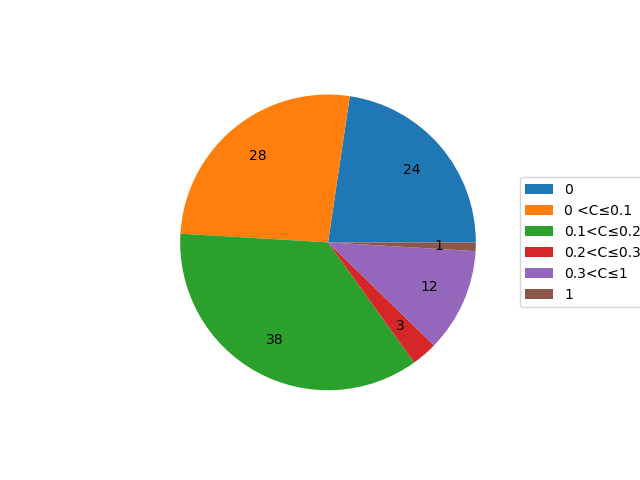

In [105]:
f, ax = plt.subplots()
ax.pie(LiNO3_pie,
       autopct=lambda pct: func(pct, LiNO3_pie),
                pctdistance=0.75,
      )
ax.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5))

plt.savefig(os.path.join(thesis_path, "LiNO3_content_all_Mole.png"), bbox_inches="tight")

# Binder

In [9]:
binder_names, binder_counts = np.unique(available_data["Binder"], return_counts=True)

In [18]:
binder_definitions = {"None": ["0", "None", "n.d."],
                      "PVDF": ["PVDF"],
                      "Other": [name for name in binder_names if name not in ["0", "None", "n.d.", "PVDF"]]}

In [25]:
binder_inner = {}
for keys, values in binder_definitions.items():
    if keys != "None":
        binder_inner.update([(keys, {"content": [],
                                     "counts": []})])
        for name in values:
            content, counts = np.unique(available_data.loc[available_data["Binder"]==name]["Binder content (wt%)"],
                                        return_counts=True)

            binder_inner[keys]["content"].append(list(content))
            binder_inner[keys]["counts"].append(list(counts))            

In [27]:
binder_inner_sums = {}

for keys, values in binder_inner.items():
    if keys not in binder_inner_sums:
        binder_inner_sums.update([(keys, {})])
        
    unique_content = np.sort(np.unique([item for sublist in [*values["content"]] for item in sublist]))
    for un_co in unique_content:
        binder_inner_sums[keys].update([(un_co, np.sum([[item for sublist in [*values["counts"]] for item in sublist][nval]
                      for nval, val in enumerate([item for sublist in [*values["content"]] for item in sublist]) if 
                                                   val==un_co]))])

In [31]:
binder_outer = {}

for keys, values in binder_definitions.items():
    if keys not in binder_outer.keys():
        binder_outer.update([(keys, [])])
        
    for name in values:
        binder_outer[keys].append([binder_counts[n_b_name] for 
                                   n_b_name, b_name in enumerate(binder_names) if b_name==name][0])
binder_outer["None"] = [sum(binder_outer["None"])]

In [33]:
binder_inner_sums.update([("None", {"0": binder_outer["None"][0]})])

In [47]:
binder_inner_sums_order = dict([(keys, binder_inner_sums[keys]) for keys in binder_outer.keys()])

In [51]:
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:d}".format(absolute)

In [85]:
colors_binder = {"PVDF": "Reds",
          "Other": "Blues",
          "None": "Greys"}

colormap_binder = {}
for keys, values in binder_inner_sums_order.items():
    colormap_binder.update([(keys, [vars(plt.cm)[colors_binder[keys]](i) for i in 
                             np.linspace(0.3, 0.6, len(values))])])

<IPython.core.display.Javascript object>


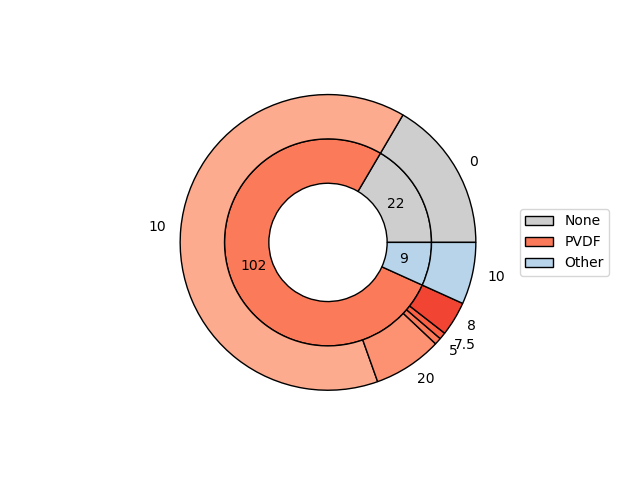

In [89]:
f, ax = plt.subplots()
size = 0.3
ax.pie([sum(values) for values in binder_outer.values()],
       radius=1-size, wedgeprops=dict(width=size, edgecolor="k"), 
       autopct=lambda pct: func(pct, [sum(values) for values in binder_outer.values()]),
                pctdistance=0.75,
      colors=[values[int(len(values)/2)] for values in colormap_binder.values()])
outer_labels = binder_outer.keys()
ax.legend(outer_labels, loc="center left", bbox_to_anchor=(1, 0.5))

ax.pie([items for sublist in [list(values.values()) for values in binder_inner_sums_order.values()] for items in sublist],
       radius=1, wedgeprops=dict(width=size, edgecolor="k"),
       colors=[item for sublist in [*colormap_binder.values()] for item in sublist],
      labels=[items for sublist in [list(values.keys()) for values in binder_inner_sums_order.values()] for items in sublist]);
plt.savefig(os.path.join(thesis_path, "Binder_type_content.png"), bbox_inches="tight")

In [34]:
binder_inner_sums

{'PVDF': {'10': 85, '20': 10, '5': 1, '7.5': 1, '8': 5},
 'Other': {'10': 9},
 'None': {'0': 22}}

# Additive

In [54]:
conductive_add_names, conductive_add_counts = np.unique(available_data["Conductive additive"], return_counts=True)

In [55]:
conductive_add_names

array(['', '0', 'Acetylene black', 'Acetylene carbon black', 'CNTs',
       'Carbon black', 'Carbon fibers with carbon nanofibers',
       'Conductive carbon black', 'None', 'Super C65',
       'Super C65 + Printex XE2', 'Super P carbon black',
       'Super-P carbon black', 'Super-S carbon black', 'carbon black',
       'conducting carbon', 'n.d.'], dtype=object)

In [56]:
conductive_add_definitions = {"None": ["0", "None", "n.d."],
                       "Acetylene black": ["Acetylene black", "Acetylene carbon black"],
                       "Carbon black (other)": ["Conductive carbon black", "conducting carbon",
                                                "Super-S carbon black", "Carbon black", "carbon black", 
                                                "Super C65", "Super C65 + Printex XE2"],
                       "Super P carbon black": ["Super-P carbon black", "Super P carbon black"],
                       "Nanofibers and nanotubes": ["CNTs", "Carbon fibers with carbon nanofibers"]}

In [57]:
conductive_add_inner = {}
for keys, values in conductive_add_definitions.items():
    if keys != "None":
        if keys not in conductive_add_inner:
            conductive_add_inner.update([(keys, {"content": [],
                                                 "counts": []})])
        for name in values:
            content, counts = np.unique(available_data.loc[available_data["Conductive additive"] == name]["Conductive additive content (wt%)"],
                                          return_counts=True)
            conductive_add_inner[keys]["content"].append(list(content))
            conductive_add_inner[keys]["counts"].append(list(counts))

In [58]:
conductive_add_inner_sums = {}

for keys, values in conductive_add_inner.items():
    if keys not in conductive_add_inner_sums:
        conductive_add_inner_sums.update([(keys, {})])
        
    unique_content = np.sort(np.unique([item for sublist in [*values["content"]] for item in sublist]))
    for un_co in unique_content:
        conductive_add_inner_sums[keys].update([(un_co, np.sum([[item for sublist in [*values["counts"]] for item in sublist][nval]
                      for nval, val in enumerate([item for sublist in [*values["content"]] for item in sublist]) if 
                                                   val==un_co]))])

In [59]:
conductive_add_outer = {}

for keys, values in conductive_add_definitions.items():
    if keys not in conductive_add_outer.keys():
        conductive_add_outer.update([(keys, [])])
        
    for name in values:
        conductive_add_outer[keys].append([conductive_add_counts[n_ca_name] for 
                                           n_ca_name, ca_name in enumerate(conductive_add_names) if ca_name==name][0])
conductive_add_outer["None"] = [sum(conductive_add_outer["None"])]

In [60]:
conductive_add_inner_sums.update([("None", {"0": conductive_add_outer["None"][0]})])

In [61]:
colors = {"Acetylene black": "Reds",
          "Carbon black (other)": "Blues",
          "Super P carbon black": "Oranges",
          "Nanofibers and nanotubes": "Greens",
          "None": "Greys"}

In [64]:
conductive_add_inner_order = dict([(keys, conductive_add_inner_sums[keys]) for keys in conductive_add_outer.keys()])

In [65]:
colormap = {}
for keys, values in conductive_add_inner_order.items():
    colormap.update([(keys, [vars(plt.cm)[colors[keys]](i) for i in 
                             np.linspace(0.2, 0.6, len(values))])])

In [67]:
conductive_add_outer

{'None': [39],
 'Acetylene black': [21, 3],
 'Carbon black (other)': [3, 2, 2, 21, 5, 1, 3],
 'Super P carbon black': [5, 14],
 'Nanofibers and nanotubes': [4, 4]}

<IPython.core.display.Javascript object>


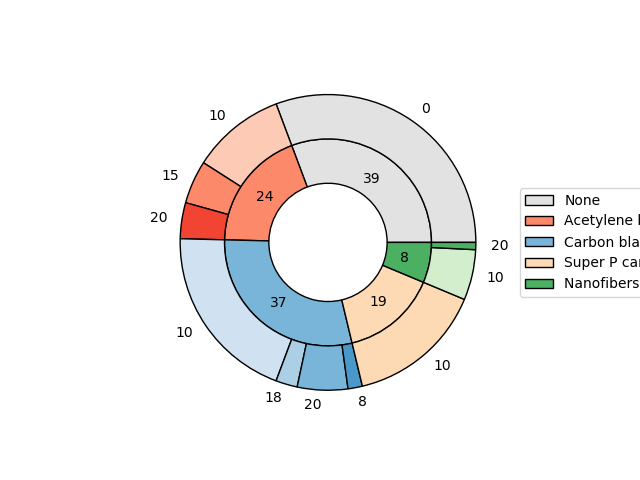

In [68]:
f, ax = plt.subplots()
size = 0.3

outers = ax.pie([np.sum(values) for values in conductive_add_outer.values()],
       radius=1-size, wedgeprops=dict(width=size, edgecolor="k"),
       colors=[values[int(len(values)/2)] for values in colormap.values()],
                autopct=lambda pct: func(pct, [np.sum(values) for values in conductive_add_outer.values()]),
                pctdistance=0.75)
outer_labels = conductive_add_outer.keys()
ax.legend(outer_labels, bbox_to_anchor=(1, 0.5), loc="center left")
inners = ax.pie([item for sublist in [list(values.values()) for values in conductive_add_inner_order.values()] for item in sublist],
       radius=1, wedgeprops=dict(width=size,edgecolor="k"),
       colors=[item for sublist in [*colormap.values()] for item in sublist],
       labels=[item for sublist in [list(values.keys()) for values in conductive_add_inner_order.values()] for item in sublist])

plt.savefig(os.path.join(thesis_path, "Conductive_additive_type_content.png"), bbox_inches="tight")

In [ ]:
thesis_path

# Voltage min/ max ranges

In [ ]:
unique_min = np.unique(df["Minimum voltage"])
unique_max = np.unique(df["Maximum voltage"])
voltage_ranges = np.vstack((np.array(df["Minimum voltage"]), np.array(df["Maximum voltage"])))

In [ ]:
vrange_counts = np.full((unique_min.shape[0],
                         unique_max.shape[0]), 0)

In [ ]:
for nmin, umin in enumerate(unique_min):
    for nmax, umax in enumerate(unique_max):
        match = [nvolt for nvolt in range(voltage_ranges.shape[1]) if voltage_ranges[0, nvolt]==umin
                 and voltage_ranges[1, nvolt]==umax]
        vrange_counts[nmin, nmax] = len(match)

In [ ]:
import matplotlib.patches as mpatch

In [ ]:
f, ax = plt.subplots()
umin = 3
umax = 0

colors = [plt.cm.tab20(i) for i in range(np.nonzero(vrange_counts)[0].shape[0])]

ax.set_xlim([0.8, 3.8])
ax.set_ylim([0, np.max(vrange_counts)+2]);

ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.xaxis.grid(which="minor", lw=0.2)
ax.xaxis.grid(which="major")

ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.grid(which="minor", lw=0.2)
ax.yaxis.grid(which="major")

for umin in range(vrange_counts.shape[0]):
    for umax in range(vrange_counts.shape[1]):
        if vrange_counts[umin, umax] > 0:
            ax.errorbar(x=[np.nanmedian([unique_min[umin], unique_max[umax]])],
                        y=[vrange_counts[umin, umax]],
                        xerr=np.array([[np.nanmedian([unique_min[umin], unique_max[umax]])-unique_min[umin]],
                                      [unique_max[umax]-np.nanmedian([unique_min[umin], unique_max[umax]])]]),
                       capsize=10)
listar = mpatch.Rectangle(xy=(1.8, 0),
                          width=(2.6-1.8),
                          height=100,
                          facecolor="navy",
                          alpha=0.1,
                          zorder=0)
ax.add_patch(listar)
ax.set_ylabel("Number of reports (total {})".format(len(bibliography_list)))
ax.set_xlabel("Galvanostatic voltage range (V)")
plt.savefig(os.path.join(thesis_path, "Voltage_ranges_LiSTAR_bounds.png"), bbox_inches="tight")

# Rare reports

## Electrolyte content

In [43]:
reported_ES_ratio = available_data.loc[available_data["E/S ratio (uL/g)"] != 0][["First author", "Year", "Optional label", "E/S ratio (uL/g)"]]
ES_values = [" ".join((reported_ES_ratio["First author"][i],
                       reported_ES_ratio["Year"][i],
                       reported_ES_ratio["Optional label"][i]))
            for i in reported_ES_ratio.index]

In [44]:
reported_electrolyte = available_data.loc[available_data["Electrolyte volume (uL)"]!=0][["First author", "Year", "Optional label", "Electrolyte volume (uL)"]]

In [45]:
electrolyte_vol_values = [" ".join((reported_electrolyte["First author"][i],
                                    reported_electrolyte["Year"][i],
                                    reported_electrolyte["Optional label"][i]))
                         for i in reported_electrolyte.index]

In [46]:
electrolyte_content_reported = np.unique(ES_values+electrolyte_vol_values)

## Thickness

In [47]:
reported_thickness_value = excludes_keywords(available_data, list_of_keywords=["NaN"], column="Electrode thickness")[["First author", "Year", "Optional label", "Electrode thickness"]]

In [48]:
thickness_reported_values = [" ".join((reported_thickness_value["First author"][i], 
           reported_thickness_value["Year"][i],
           reported_thickness_value["Optional label"][i]))
for i in reported_thickness_value.index if len(reported_thickness_value["Electrode thickness"][i])>0]

In [49]:
np.unique(thickness_reported_values).shape[0]/len(bibliography_list)

0.13846153846153847

## Reported surface area

In [50]:
reported_area_value = [re.findall("\d+.\d+", value) for value in 
                       list(available_data["Surface area (cm2/g)"]) if type(value)==str and
                       len(re.findall("\d+.\d+", value))>0]

In [51]:
area_reported_values = [" ".join((name for name in 
                                  list(available_data.loc[nnumber][["First author", "Year", "Optional label"]])))
                        for nnumber, number in enumerate(reported_area_value)]

In [52]:
np.unique(area_reported_values).shape[0]/len(bibliography_list)

0.5076923076923077

## Reported porosity

In [53]:
reported_pore_volume = [re.findall("\d+.\d+", value) for value in 
                        list(available_data["Pore volume"]) if type(value)==str
                        and len(re.findall("\d+.\d+", value))>0]

In [54]:
pore_volume_papers = [" ".join((name for name in list(available_data.loc[nnumber][["First author", "Year", "Optional label"]])))
 for nnumber, number in enumerate(reported_pore_volume)]

In [55]:
np.unique(pore_volume_papers).shape[0]/len(bibliography_list)

0.38461538461538464

## Reported conductivity

In [56]:
reported_conductivity = [re.findall("\d+.\d+", value) for value in list(available_data["Host conductivity"]) if type(value)==str and len(re.findall("\d+.\d+", value))>0]
reported_conductivity_papers = [" ".join((name for name in list(available_data.loc[nnumber][["First author", "Year", "Optional label"]])))
                                for nnumber, number in enumerate(reported_conductivity)]

In [57]:
np.unique(reported_conductivity_papers).shape[0]/len(bibliography_list)

0.1076923076923077

In [62]:
area_count = np.unique(area_reported_values).shape[0]
volume_count = np.unique(pore_volume_papers).shape[0]
conductivity_count = np.unique(reported_conductivity_papers).shape[0]
thickness_count = np.unique(thickness_reported_values).shape[0]
electrolyte_count = np.unique(electrolyte_content_reported).shape[0]

In [59]:
plt.rcParams.update({"xtick.direction": "in"})
plt.rcParams.update({"xtick.top": True})

<IPython.core.display.Javascript object>


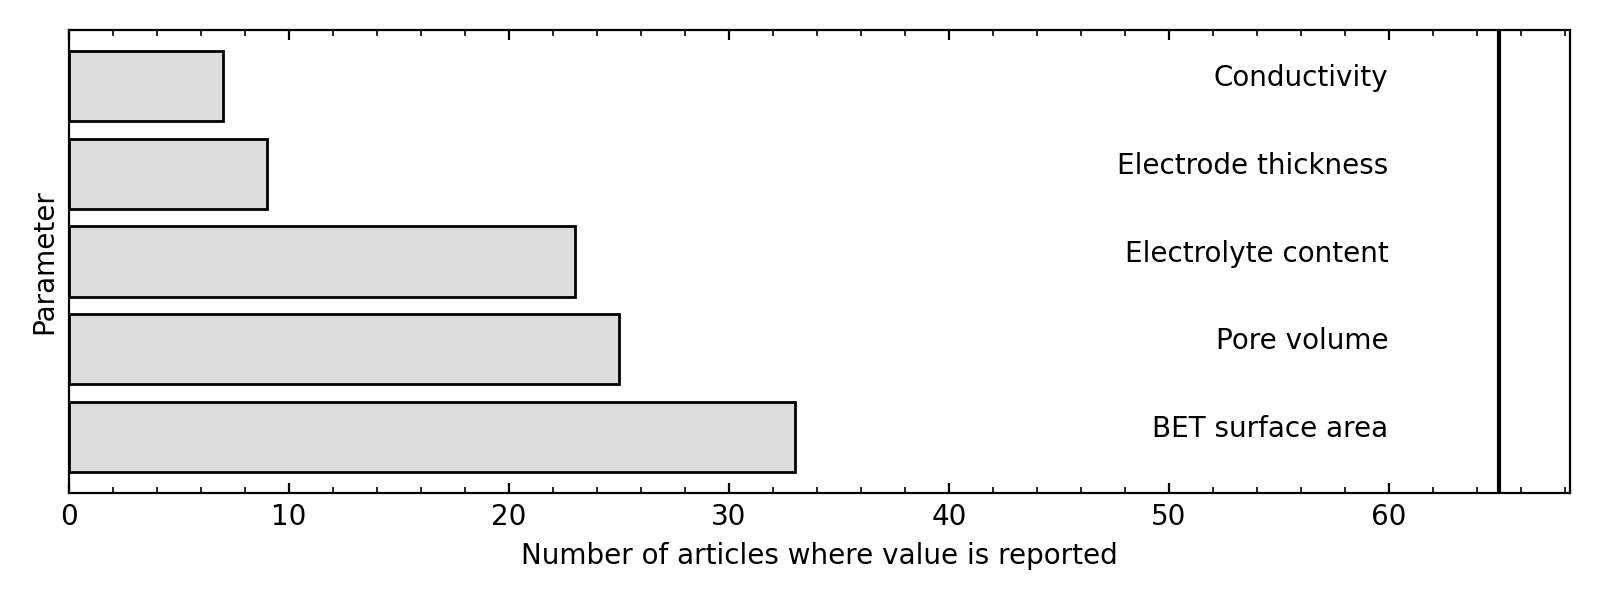

In [65]:
f, ax = plt.subplots(figsize=(8, 3))
bar_widths = [area_count, volume_count, electrolyte_count, thickness_count, conductivity_count, ]
labels = ["BET surface area", "Pore volume", "Electrolyte content", "Electrode thickness", "Conductivity"]

ax.barh(y=np.arange(len(bar_widths)),
        width=bar_widths, color="gainsboro", edgecolor="k")
ax.axvline(len(bibliography_list), color="k")
ax.set_yticks([])
for nname, name in enumerate(labels):
    ax.text(s=name, x=len(bibliography_list)-5, y=nname, ha="right")
    
ax.set_xlabel("Number of articles where value is reported")
ax.set_ylabel("Parameter")

ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(2))
plt.tight_layout()

plt.savefig(os.path.join(thesis_path, "Rarely_reported_parameters.png"), bbox_inches="tight")

# Carbon host distribution

In [14]:
carbon_types = {"Graphene": {"include": ["graphene"],
                             "exclude": ["composite", "reduced", "oxide"]},
                "Graphene oxide": {"include": ["graphene oxide", "GO"],
                                   "exclude": ["reduced", "and"]},
                "Reduced graphene oxide": {"include": ["reduced graphene oxide", "RGO"],
                                           "exclude": ["and"]},
                "Templated carbon": {"include": ["hierarchical", "template", "CMK", "mesoporous"],
                                     "exclude": ["graphene"]},
                }

In [15]:
carbon_data = dict([(keys, 
                     cont_multi_keywords(df=excludes_keywords(df=available_data,
                                                              list_of_keywords=values["exclude"],
                                                              column="Carbon type",
                                                              case=False),
                                        list_of_keywords=values["include"],
                                        column="Carbon type",
                                        case=False)) for keys, values in carbon_types.items()])

In [18]:
carbon_data["Graphene"]["Surface area (cm2/g)"]

1      578.2
2      578.2
3      114.1
18       139
19          
20          
67          
111      160
113         
122     1628
129     27.4
130     27.4
131     27.4
132         
Name: Surface area (cm2/g), dtype: object

In [11]:
carbon_data["Graphene oxide"][["First author", "Year", "Optional label"]]

,First author,Year,Optional label
0,Benitez,2019,Physical activation
12,Cheng,2019,Interconnected crumpled nitrogen
13,Cheng,2019,Interconnected crumpled nitrogen
21,Du,2021,Graphene oxide
22,Evers,2012,One pot
23,Gomez-Urbano,2019,Aerogels
24,Gomez-Urbano,2019,Aerogels
43,Ji,2011,Graphene oxide
88,Wang,2011,graphene-wrapped
89,Wang,2011,graphene-wrapped


In [12]:
carbon_data_inclusive = dict([(keys, 
                               cont_multi_keywords(df=available_data,
                                                   list_of_keywords=values["include"],
                                                   column="Carbon type",
                                                   case=False)) for keys, values in carbon_types.items()])

In [13]:
overlaps = []

for nk1, keys_1 in enumerate(carbon_data_inclusive.keys()):
    for nk2, keys_2 in enumerate(carbon_data_inclusive.keys()):
        if nk2 < nk1:
            overlap = set(carbon_data_inclusive[keys_1]["Host label"]) & set(carbon_data_inclusive[keys_2]["Host label"])
            if len(overlap) > 0:
                overlaps.append([keys_1, keys_2, list(overlap)])

In [14]:
carbon_overlaps = dict([("+\n".join((overlaps[idx][0], overlaps[idx][1])), 
                        len(overlaps[idx][-1])-\
                         len(set(carbon_data[overlaps[idx][0]]["Host label"]) & set(overlaps[idx][-1]))-\
                         len(set(carbon_data[overlaps[idx][1]]["Host label"]) & set(overlaps[idx][-1]))
                        )
                        for idx in range(len(overlaps))])

In [15]:
carbon_overlaps_combined = {'Graphene oxide+\nGraphene': carbon_overlaps["Graphene oxide+\nGraphene"],
                           'Reduced graphene oxide+\nGraphene': carbon_overlaps["Reduced graphene oxide+\nGraphene"],
                             'Reduced graphene oxide+\nGraphene oxide': carbon_overlaps["Reduced graphene oxide+\nGraphene oxide"],
                           "Templated carbon+\nOther": np.sum([values for keys, values in carbon_overlaps.items() if "Templated carbon" in keys])}

In [16]:
carbon_types_combined = {**dict([(keys, len(values)) for keys, values in carbon_data.items()]),
                        **carbon_overlaps_combined}

In [17]:
thesis_path

'C:\\Users\\lliam\\Dropbox\\Apps\\Overleaf\\V4_thesis\\3_Host_matrices\\Figs'

<IPython.core.display.Javascript object>


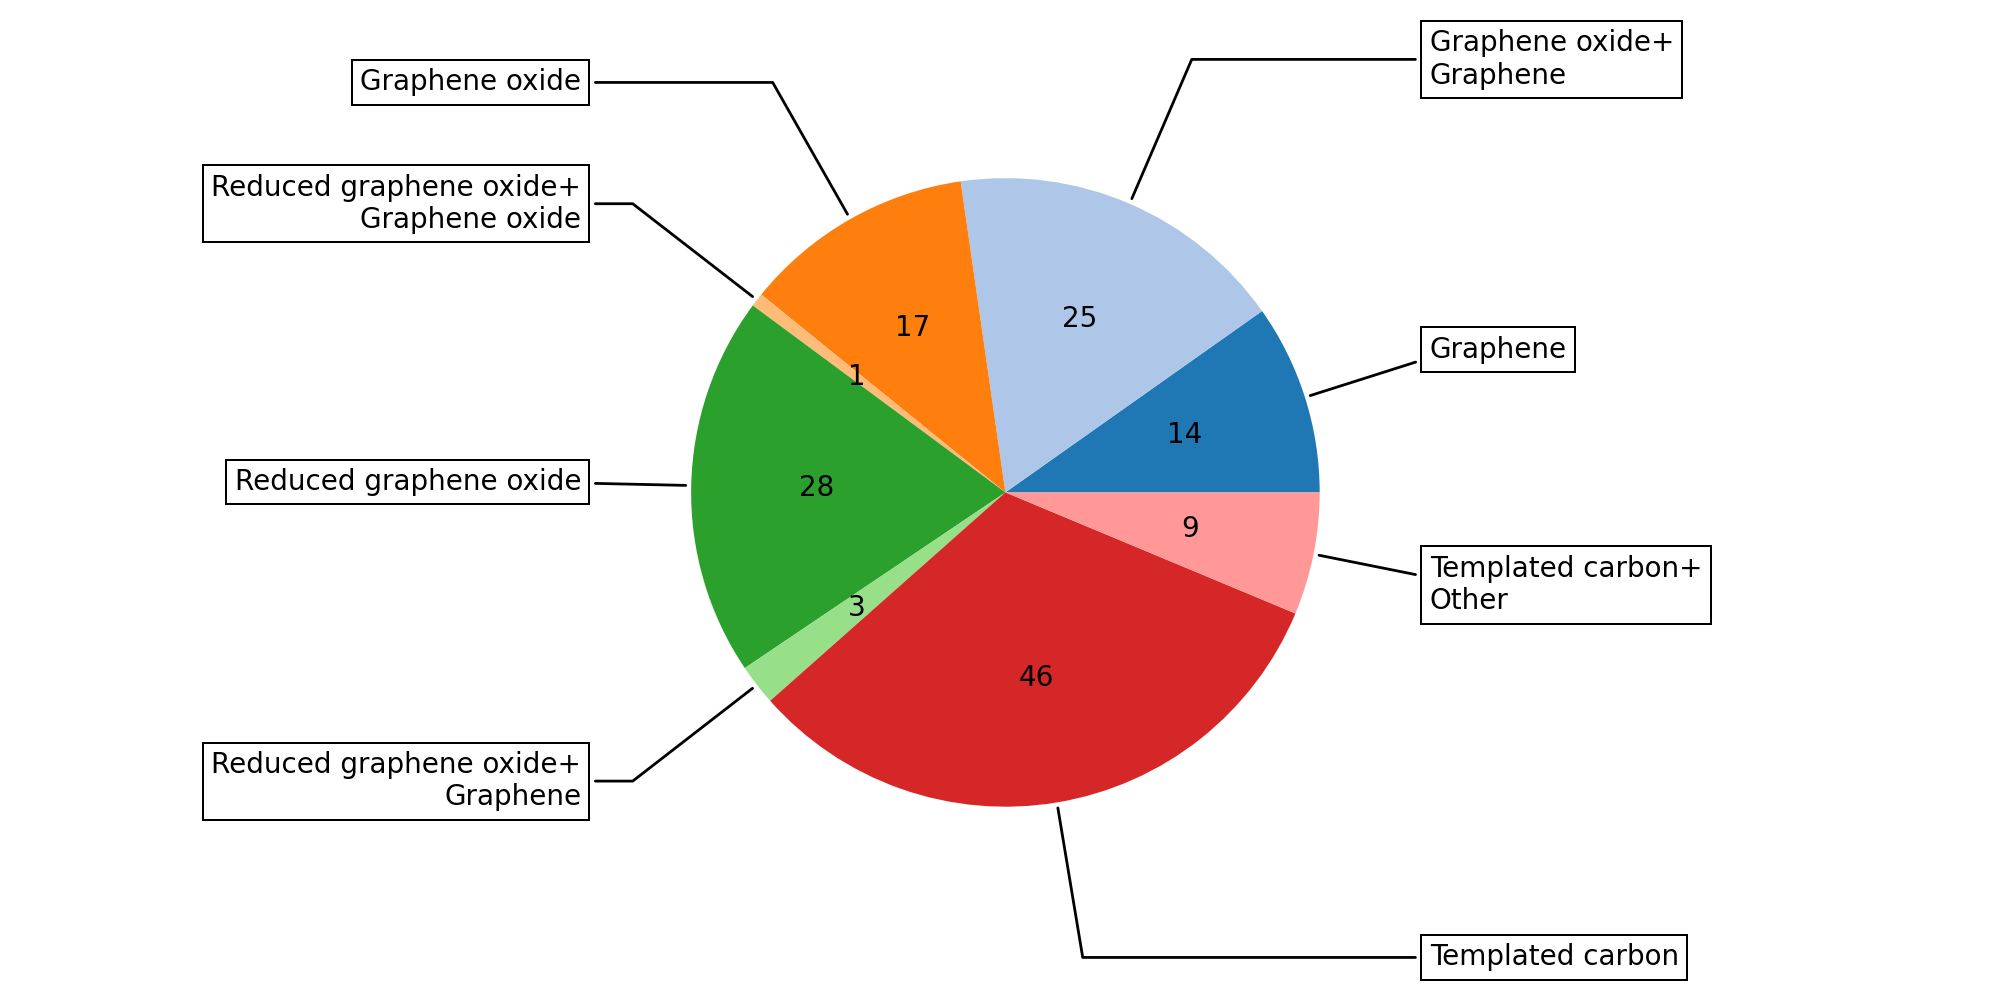

In [18]:
f, ax = plt.subplots(figsize=(10, 5))
labels = ["Graphene", "Graphene oxide+\nGraphene", "Graphene oxide", "Reduced graphene oxide+\nGraphene oxide",
          "Reduced graphene oxide", "Reduced graphene oxide+\nGraphene", 
          "Templated carbon", "Templated carbon+\nOther"]

ax.set_prop_cycle("color", [plt.cm.tab20(i) for i in range(len(labels))])

## from: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:d}".format(absolute)

wedges, texts, autotexts = ax.pie([carbon_types_combined[keys] for keys in labels],
                      startangle=0,
                                  autopct=lambda pct: func(pct, [carbon_types_combined[keys] for keys in labels]))

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")


for i, p in enumerate(wedges):
    ang = (p.theta2-p.theta1)/2+p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.5*y),
                horizontalalignment=horizontalalignment, **kw)
plt.tight_layout()

plt.savefig(os.path.join(thesis_path, "Carbon_host_types_pie.png"), bbox_inches="tight")

# Sulfur loading method

In [9]:
sulfur_loading_labels = {"Thermal": {"include": ["thermal"],
                                     "exclude": ["solution", "chemical"]},
                         "Chemical": {"include": ["Chemical", "Na2S2O3"],
                                    "exclude": ["thermal", "CS2"]},
                         "Solution": {"include": ["CS2", "solvent", "toluene"],
                                      "exclude": ["thermal"]}}

In [10]:
sulfur_loading = dict([(keys, cont_multi_keywords(df=excludes_keywords(df=available_data,
                                 list_of_keywords=values["exclude"],
                                 column="Sulfur loading method",
                                 case=False),
                                                 list_of_keywords=values["include"],
                                                 column="Sulfur loading method",
                                                  case=False)) for keys, values in sulfur_loading_labels.items()])

In [11]:
sulfur_loading_inclusive = dict([(keys, cont_multi_keywords(df=available_data,
                                                 list_of_keywords=values["include"],
                                                 column="Sulfur loading method",
                                                  case=False)) for keys, values in sulfur_loading_labels.items()])

In [12]:
merge_columns = [name for name in available_data.columns if "Scanned data" not in name]

In [13]:
sulfur_loading_combined = {}
for nk1, key_1 in enumerate(sulfur_loading_inclusive.keys()):
    for nk2, key_2 in enumerate(sulfur_loading_inclusive.keys()):
        if nk1 < nk2:
            sulfur_loading_combined.update([("+\n".join((key_1, key_2)),
                                             pd.merge(sulfur_loading_inclusive[key_1][merge_columns],
                                                      sulfur_loading_inclusive[key_2][merge_columns]))])

In [14]:
sulfur_loading_combined = dict([(keys, values) for keys, values in sulfur_loading_combined.items() if len(values)>0])

In [15]:
sulfur_loading_total = {**sulfur_loading, **sulfur_loading_combined}

In [16]:
method_XRD = dict([(name, {"Present": len([n for n in sulfur_loading_total[name]["Sulfur XRD"] if n==True]),
              "Absent": len([n for n in sulfur_loading_total[name]["Sulfur XRD"] if n==False]),
              "No data": len([n for n in sulfur_loading_total[name]["Sulfur XRD"] if n!=True and n!=False])})
       for name in sulfur_loading_total.keys()])

In [17]:
colors = [item for sublist in [[vars(plt.cm)[cmap](i) for i in np.linspace(0.3, 0.7, 3)] for cmap in ["Reds", "Greens", "Blues", "Purples"]] for item in sublist]

In [33]:
method_XRD.keys()

dict_keys(['Thermal', 'Chemical', 'Solution', 'Thermal+\nChemical', 'Thermal+\nSolution'])

In [38]:
colors_infiltration = {"Thermal": plt.cm.Reds(0.5),
                       "Thermal+\nSolution": plt.cm.Purples(0.5),
                       "Solution": plt.cm.Blues(0.5),
                       "Chemical": plt.cm.Greens(0.5),
                       "Thermal+\nChemical": plt.cm.Oranges(0.5)}

In [47]:
test = "a test string with newline"
test.replace("\n", "_")

'a test string with newline'

<IPython.core.display.Javascript object>


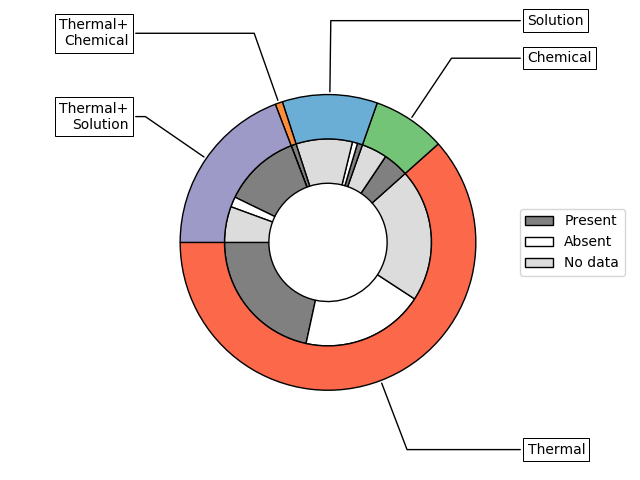

In [68]:
f, ax = plt.subplots()
size = 0.3
start_angle = 180

ax.set_prop_cycle("color", ["grey", "white", "gainsboro"])
ax.pie([item for sublist in [[*values.values()] for values in method_XRD.values()] for item in sublist],
       radius=1-size, wedgeprops=dict(width=size, edgecolor="k"), startangle=start_angle)

labels = ["Present", "Absent", "No data"]
ax.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5))

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)

kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

colors = [colors_infiltration[keys] for keys in method_XRD.keys()]
wedges, texts = ax.pie([np.sum([*values.values()]) for values in method_XRD.values()],
       radius=1, wedgeprops=dict(width=size, edgecolor="k"),
       colors=colors, startangle=start_angle)

labels = [*method_XRD.keys()]
for i, p in enumerate(wedges):
    ang = p.theta1+(p.theta2-p.theta1)/2
    x = np.cos(np.deg2rad(ang))
    y = np.sin(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.5*y),
                horizontalalignment=horizontalalignment, **kw)

plt.savefig(os.path.join(thesis_path, "Loading_XRD_sulfur_pie_by_method.png"), bbox_inches="tight")

<IPython.core.display.Javascript object>


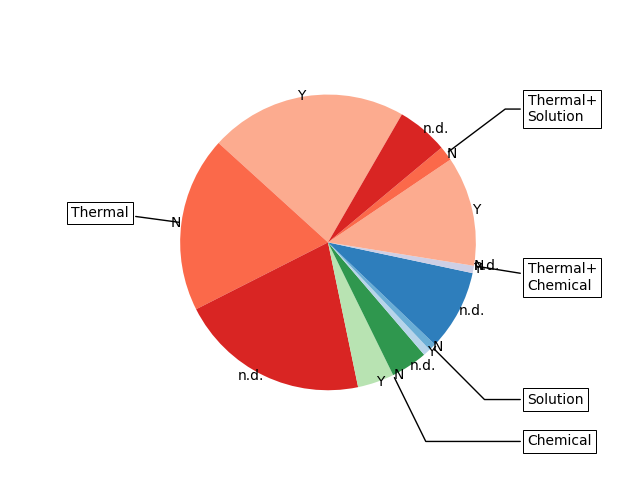

In [21]:
f, ax = plt.subplots()
ax.set_prop_cycle("color", colors)
labels = [*method_XRD.keys()]

inner_labels = ["Y", "N", "n.d."]*len(method_XRD)

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)

kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

wedges, texts = ax.pie([item for sublist in [list(values.values()) for values in method_XRD.values()] for item in sublist],
                      startangle=60,
                      labels=inner_labels, labeldistance=1,
                      )

for i, p in enumerate(wedges[1:][::3]):
    ang = p.theta1+(p.theta2-p.theta1)/2
    x = np.cos(np.deg2rad(ang))
    y = np.sin(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.5*y),
                horizontalalignment=horizontalalignment, **kw)
# plt.savefig(os.path.join(thesis_path, "Loading_XRD_sulfur_pie_by_method.png"), bbox_inches="tight")

# CRates

In [19]:
data_load = {}
formation_cycles = 5

for idx in available_data.index:
    label = " ".join((available_data.iloc[idx]["First author"],
                                 available_data.iloc[idx]["Year"],
                                 available_data.iloc[idx]["Optional label"]))
    data_load.update([(label, [])])
    for fname in available_data.iloc[idx]["Scanned data"]:
        CRates = np.load(fname, allow_pickle=True)[1]
        available_rates, rates_count = np.unique(CRates[1], return_counts=True)
        if rates_count.shape[0] == 1:
            data_load[label].append(available_rates[0])
        elif rates_count.shape[0] == 2:
            if min(rates_count) < formation_cycles:
                data_load[label].append(available_rates[np.argmax(rates_count)])

In [49]:
year_CRate = []
formation_cycles = 5

for idx in available_data.index:
    year = available_data.iloc[idx]["Year"]
    for fname in available_data.iloc[idx]["Scanned data"]:
        CRates = np.load(fname, allow_pickle=True)[1]
        available_rates, rates_count = np.unique(CRates[1], return_counts=True)
        if rates_count.shape[0] == 1:
            year_CRate.append([int(year), available_rates.flatten()[0]])
        elif rates_count.shape[0] == 2:
            if min(rates_count) < formation_cycles:
                year_CRate.append([int(year), available_rates[np.argmax(rates_count)].flatten()[0]])
                
year_CRate = np.array(year_CRate)

In [54]:
years = np.unique(year_CRate[:, 0])

In [60]:
data_year = dict([(int(year), []) for year in years])
for i in range(year_CRate.shape[0]):
    for y in years:
        if year_CRate[i, 0] == y:
            data_year[y].append(year_CRate[i, 1])

<IPython.core.display.Javascript object>


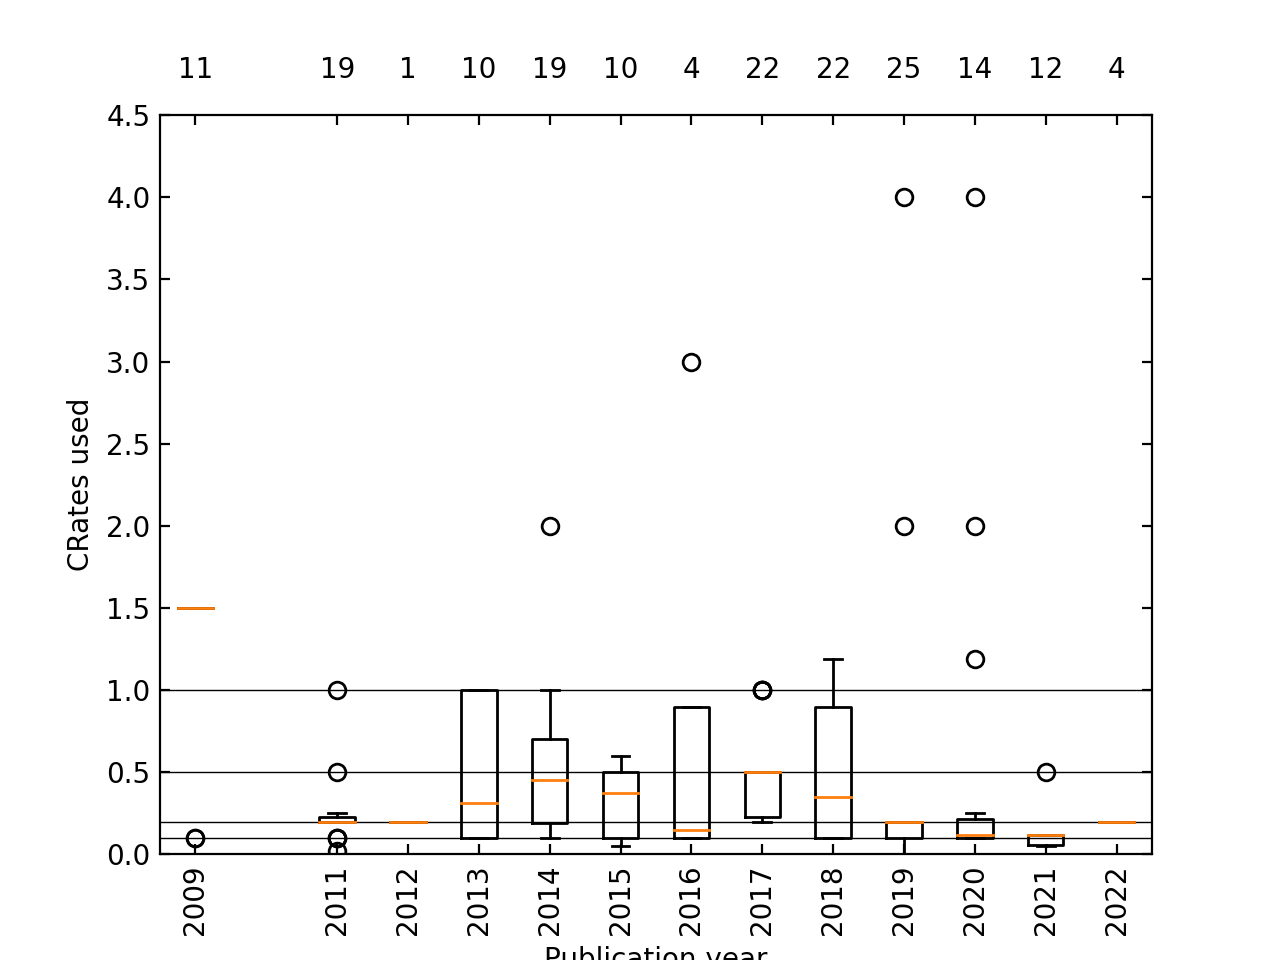

In [82]:
f, ax = plt.subplots()
ax.boxplot([*data_year.values()], positions=[*data_year.keys()])
trans = ax.get_xaxis_transform()

for keys, values in data_year.items():
    ax.annotate(text=len(values), xy=(keys, 1.05), xycoords=trans, ha="center")
ax.set_ylim([0, 4.5])
ax.set_xticks([*data_year.keys()])
ax.set_xticklabels([*data_year.keys()], rotation=90);
for rate in [0.1, 0.2, 0.5, 1]:
    ax.axhline(rate, color="k", lw=0.5, zorder=0)
ax.set_xlabel("Publication year")
ax.set_ylabel("CRates used")
plt.savefig(os.path.join(thesis_path, "CRate_years.png"), bbox_inches="tight")

In [20]:
all_CRates = [item for sublist in [*data_load.values()] for item in sublist]

- < 0.1
- 0.1 - 0.15
- 0.15 - 0.3
- 0.35 - 0.6
- 0.9 - 1.4

In [21]:
CRate_mins = [0.0,  0.08, 0.15, 0.35, 0.9, 1.8, 2.25]
CRate_maxs = [0.08, 0.15, 0.30, 0.60, 1.4, 2.2, np.inf]
CRate_names = ["< 0.1", "0.1", "0.2", "0.5", "1", "2", "> 2"]

In [22]:
values_binned = [len([value for value in all_CRates if value>CRate_mins[n] and value<=CRate_maxs[n]]) for n in range(len(CRate_mins))]

<IPython.core.display.Javascript object>


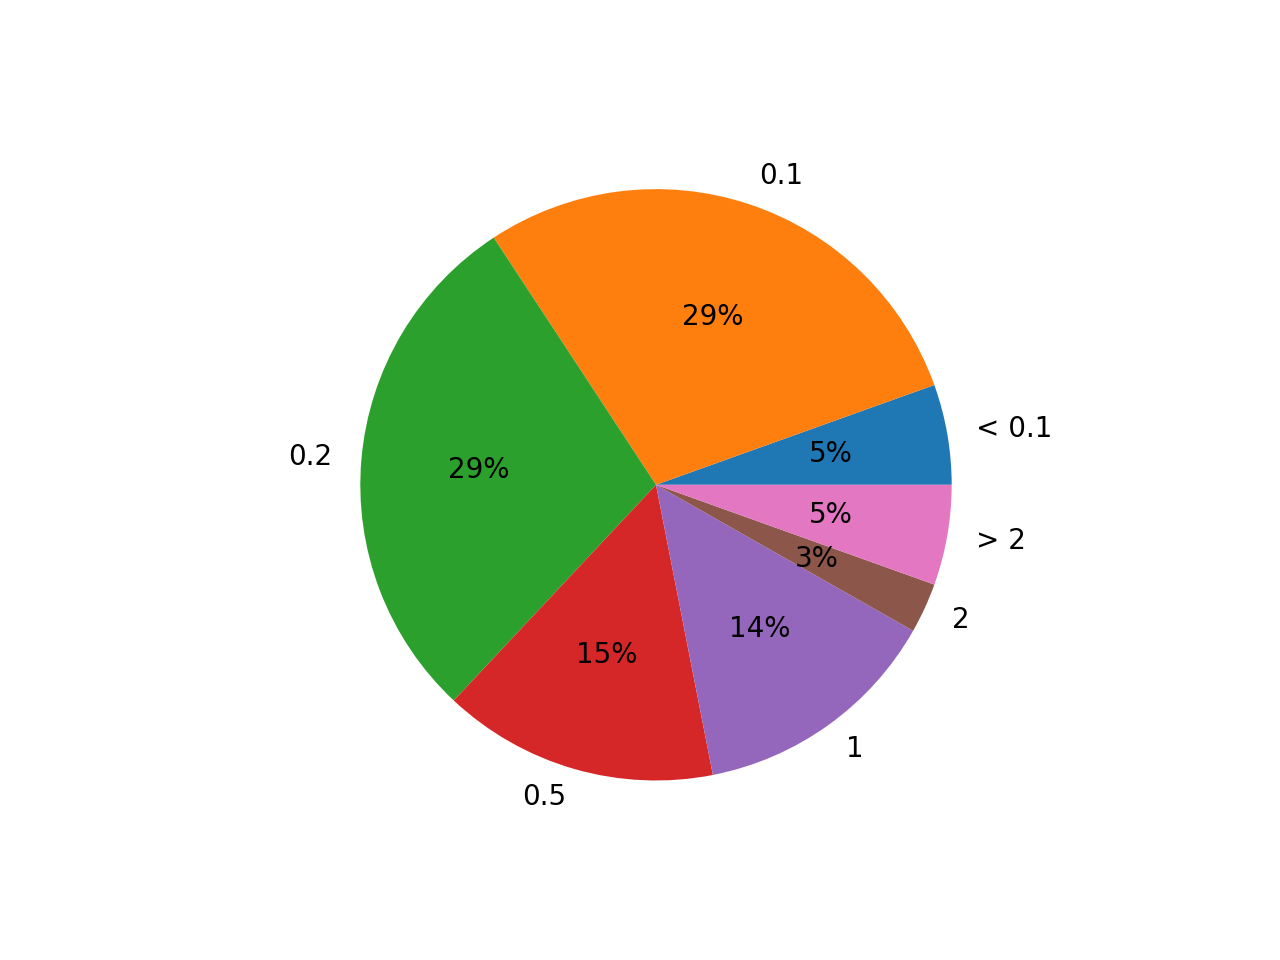

In [23]:
f, ax = plt.subplots()
ax.pie(values_binned, labels=CRate_names, autopct='%.0f%%');
# plt.savefig(os.path.join(thesis_path, "CRate_proportions_pie.png"), bbox_inches="tight")

# 

In [24]:
def compare_capacity(cycle_number, crate_min, crate_max, formation_cycles=5):
    capacity_dict = {}
    compare_variables = ["Sulfur loading (wt%)", "CRate", "Capacity", "Label", "yerr"]

    for key in carbon_data.keys():
        capacity_dict.update([(key, dict([(key, []) for key in compare_variables]))])
        for idx in carbon_data[key]["Scanned data"].index:
            for entry in carbon_data[key]["Scanned data"][idx]:
                record = np.load(entry, allow_pickle=True)
                ## Records should be 3 rows x cycle columns. If saved incorrectly, may be transposed
                if record.shape[1] == 3:
                    record = record.T
                
                first_value = np.min(np.argwhere(np.isfinite(record[-1])))
                crates = record[1]
                unique_rates, rate_counts = np.unique(crates, return_counts=True)
                if unique_rates.shape[0] == 2 and rate_counts[np.argmin(unique_rates)] < formation_cycles:
                    crate_use = np.max(unique_rates)
                elif unique_rates.shape[0] == 1:
                    crate_use = unique_rates[0]
                    
                if crate_use>crate_min and crate_use<=crate_max:
                    if type(cycle_number) == int and cycle_number<record.shape[1]:
                        capacity_dict[key]["Capacity"].append(record[-1][first_value+cycle_number])
                    elif type(cycle_number) == list:
                        cyc_cap = [np.nan, np.nan]
                        for ncyc, cyc in enumerate(cycle_number):
                            if cyc<record.shape[1]:
                                
                                cyc_cap[ncyc] = record[-1][first_value+cyc]
                        capacity_dict[key]["Capacity"].append(np.nanmedian(cyc_cap))
                        capacity_dict[key]["yerr"].append(cyc_cap[::-1])
                        
                    try:
                        capacity_dict[key]["Sulfur loading (wt%)"].append(float(carbon_data[key]["Sulfur loading (wt%)"][idx]))
                    except:
                        capacity_dict[key]["Sulfur loading (wt%)"].append(np.nan)
                    capacity_dict[key]["CRate"].append(crate_use)
                    capacity_dict[key]["Label"].append(" ".join((carbon_data[key]["First author"][idx],
                                                            carbon_data[key]["Year"][idx],
                                                            carbon_data[key]["Optional label"][idx])))   
        capacity_dict[key]["yerr"] = abs(np.array(capacity_dict[key]["yerr"]).T-capacity_dict[key]["Capacity"])
    return capacity_dict

In [25]:
capacity_01 = compare_capacity([0, 10], 0.05, 0.15)
capacity_02 = compare_capacity([0, 10], 0.15, 0.25)
capacity_05 = compare_capacity([0, 10], 0.4, 0.6)
capacity_1 = compare_capacity([0, 10], 0.8, 1.2)
capacity_2 = compare_capacity([0, 10], 1.5, 2.5)

In [26]:
capacity_2["Graphene oxide"]

{'Sulfur loading (wt%)': [],
 'CRate': [],
 'Capacity': [],
 'Label': [],
 'yerr': array([], dtype=float64)}

In [27]:
thesis_path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "Dropbox", "Apps",
                           "Overleaf", 'V4_thesis', '3_Host_matrices', "Figs")

<IPython.core.display.Javascript object>


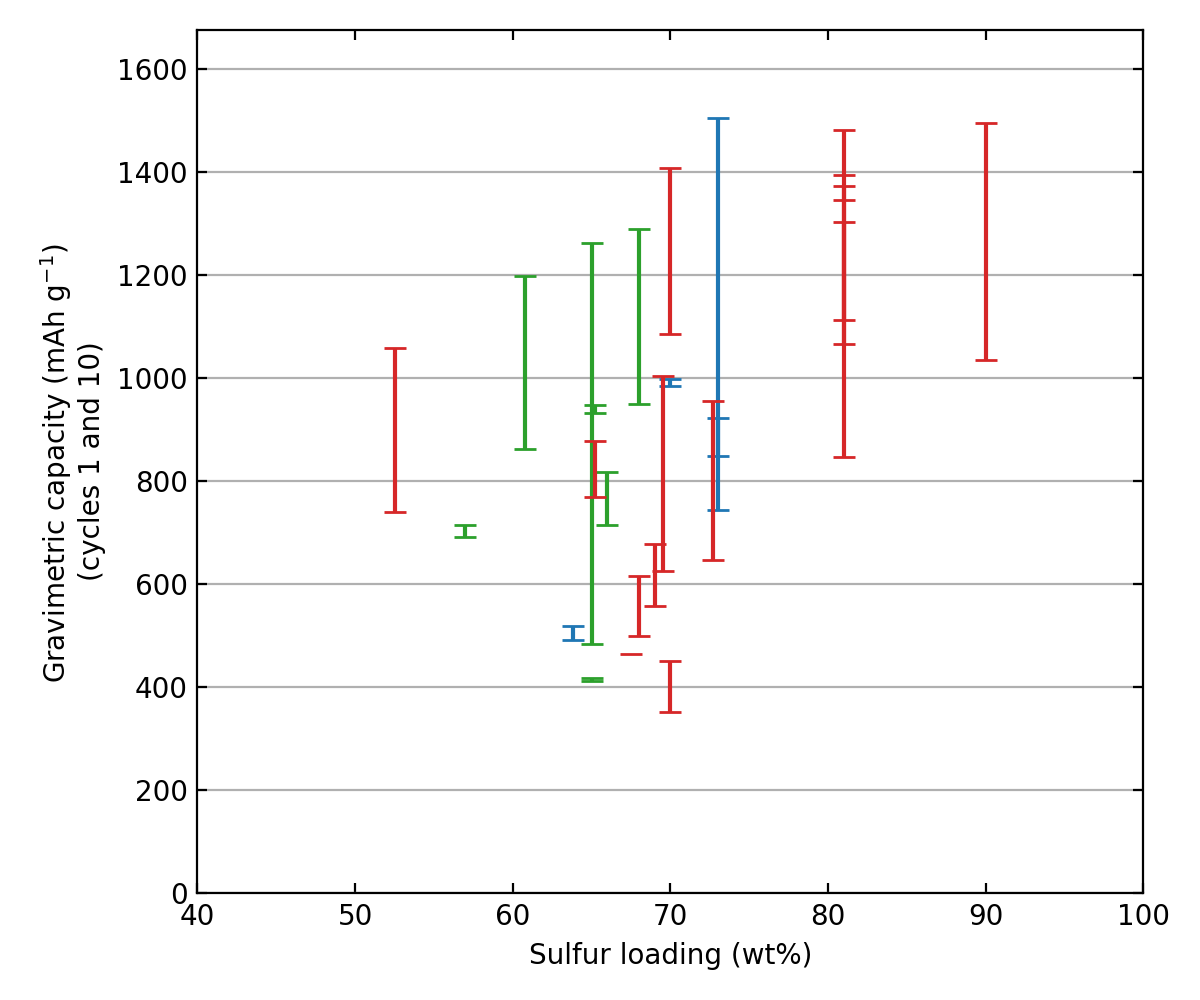

C:\Users\lliam\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\lliam\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


In [38]:
f, ax = plt.subplots(figsize=(6, 5))
[ax.errorbar(values["Sulfur loading (wt%)"], values["Capacity"], yerr=values["yerr"], 
             marker=None, ls="none", label=keys, capsize=4) 
 for keys, values in capacity_1.items()];
ax.set_xlim([40, 100])
ax.set_ylim([0, 1675])
ax.tick_params(which="both", tickdir="in", top=True, right=True)
ax.grid(axis="y")
ax.set_xlabel("Sulfur loading (wt%)")
ax.set_ylabel("Gravimetric capacity (mAh g$^{-1}$) \n(cycles 1 and 10)")
plt.tight_layout()
plt.savefig(os.path.join(thesis_path, "Sulfur_loading_host_sulfur_crate_1_only.png"), bbox_inches="tight")


<IPython.core.display.Javascript object>


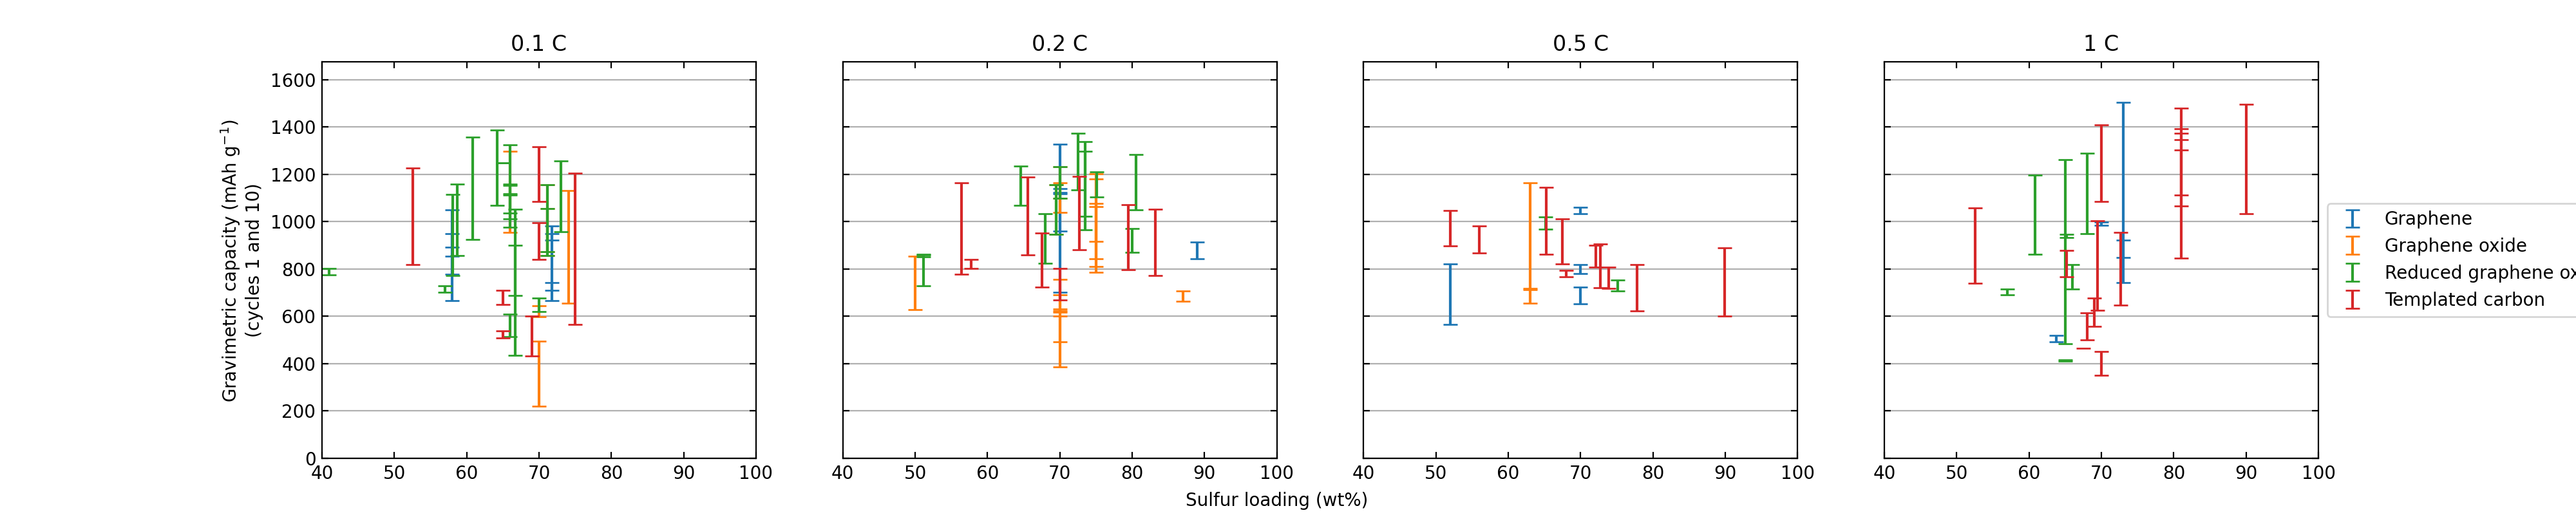

C:\Users\lliam\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\lliam\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\lliam\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\lliam\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [28]:
f, (axes) = plt.subplots(1, 4, figsize=(20, 4))

[axes[0].errorbar(values["Sulfur loading (wt%)"], values["Capacity"], yerr=values["yerr"], marker=None, ls="none", label=keys, capsize=4) 
 for keys, values in capacity_01.items()];
[axes[1].errorbar(values["Sulfur loading (wt%)"], values["Capacity"], yerr=values["yerr"], marker=None, ls="none", label=keys, capsize=4) 
 for keys, values in capacity_02.items()];
[axes[2].errorbar(values["Sulfur loading (wt%)"], values["Capacity"], yerr=values["yerr"], marker=None, ls="none", label=keys, capsize=4) 
 for keys, values in capacity_05.items()];
[axes[3].errorbar(values["Sulfur loading (wt%)"], values["Capacity"], yerr=values["yerr"], marker=None, ls="none", label=keys, capsize=4) 
 for keys, values in capacity_1.items()];

CRate_labels = [0.1, 0.2, 0.5, 1]
for nax, ax in enumerate(axes):
    ax.set_title("{} C".format(CRate_labels[nax]))
    ax.set_xlim([40, 100])
    ax.set_ylim([0, 1675])
    ax.tick_params(which="both", tickdir="in", top=True, right=True)
    ax.grid(axis="y")
    if nax > 0:
        ax.set_yticklabels([])

handles, labels = axes[0].get_legend_handles_labels()
axes[-1].legend(handles=handles, labels=labels, loc="center left", bbox_to_anchor=(1, 0.5))
trans = axes[1].get_yaxis_transform()
axes[1].annotate("Sulfur loading (wt%)", (1, -200), ha="center", xycoords=trans)
axes[0].set_ylabel("Gravimetric capacity (mAh g$^{-1}$) \n(cycles 1 and 10)")
plt.savefig(os.path.join(thesis_path, "Sulfur_loading_host_sulfur_crate.png"), bbox_inches="tight")
plt.savefig(os.path.join(thesis_path, "Sulfur_loading_host_sulfur_crate.eps"), bbox_inches="tight")

Cycles to 80% capacity

In [ ]:
def capacity_decline(decline_pc, CRate_min=None, CRate_max=None):
    capacity_dict = {}
    compare_variables = ["Sulfur loading (wt%)", "CRate", "Label", "Max capacity", "Cycles to decline", "Last cycle", "Last capacity", "In range"]

    if CRate_min == None:
        CRate_min = 0
    if CRate_max == None:
        CRate_max = 999
        
    for key in carbon_data.keys():
        capacity_dict.update([(key, dict([(key, []) for key in compare_variables]))])
        for idx in carbon_data[key]["Scanned data"].index:
            for nentry, entry in enumerate(carbon_data[key]["Scanned data"][idx]):
                record = np.load(entry, allow_pickle=True)
                if record.shape[1] == 3:
                    record = record.T
                
                crates = record[1]
                
                unique_rates, rate_counts = np.unique(crates, return_counts=True)
                if unique_rates.shape[0] == 1 and unique_rates[0]<CRate_max and unique_rates[0]>CRate_min:
                    record_filtered = np.full((record.shape[1]), np.nan)
                    d_cap = record[-1][np.isfinite(record[-1])][1:]-record[-1][np.isfinite(record[-1])][:-1]
                    no_spike = np.nonzero((d_cap > np.nanmean(d_cap)-np.nanstd(d_cap)) & (d_cap < np.nanmean(d_cap)+np.std(d_cap)))

                    record_filtered[no_spike] = record[-1][no_spike]
                    if np.argwhere(np.isfinite(record_filtered)).shape[0] > record_filtered.shape[0]/2:
                    
                        first_value = np.min(np.argwhere(np.isfinite(record_filtered)))
                        last_value = np.max(np.argwhere(np.isfinite(record_filtered)))

                        high_capacity = np.nanmax(record_filtered)
                        min_capacity = (decline_pc/100)*high_capacity
                        min_capacity_idx = first_value+np.argmin(abs(record_filtered[first_value:]-min_capacity))

                        capacity_dict[key]["Sulfur loading (wt%)"].append(carbon_data[key]["Sulfur loading (wt%)"][idx])
                        capacity_dict[key]["CRate"].append(unique_rates[0])
                        capacity_dict[key]["Label"].append(" ".join((carbon_data[key]["First author"][idx],
                                                                     carbon_data[key]["Year"][idx],
                                                                     carbon_data[key]["Optional label"][idx])))
                        capacity_dict[key]["Max capacity"].append(high_capacity)
                        capacity_dict[key]["Cycles to decline"].append(min_capacity_idx)
                        capacity_dict[key]["Last cycle"].append(last_value-first_value)
                        capacity_dict[key]["Last capacity"].append(record_filtered[last_value])
                        if min_capacity_idx >= last_value-first_value:
                            capacity_dict[key]["In range"].append(False)
                        else:
                            capacity_dict[key]["In range"].append(True)
    return capacity_dict

In [ ]:
cap_dec_01 = capacity_decline(80, 0.05, 0.15)
cap_dec_02 = capacity_decline(80, 0.15, 0.25)
cap_dec_05 = capacity_decline(80, 0.4, 0.6)
cap_dec_1 = capacity_decline(80, 0.8, 1.2)
cap_dec_2 = capacity_decline(80, 1.5, 2.5)

In [ ]:
labels = [*carbon_data.keys()]
label_pos = np.linspace(-0.5, 0.5, len(labels)+4)[2:-2]
rate_labels = [0.1, 0.2, 0.5, 1, 2]
rate_pos = np.arange(len(rate_labels))

In [ ]:
cycles_to_decline = [[list(pd.DataFrame(cap_dec[name]).loc[pd.DataFrame(cap_dec[name])["In range"]==True]["Cycles to decline"]) for name in labels] for cap_dec in [cap_dec_01, cap_dec_02, cap_dec_05, cap_dec_1, cap_dec_2]]

In [ ]:
cycles_total = [[list(pd.DataFrame(cap_dec[name]).loc[pd.DataFrame(cap_dec[name])["In range"]==False]["Cycles to decline"]) for name in labels] for cap_dec in [cap_dec_01, cap_dec_02, cap_dec_05, cap_dec_1, cap_dec_2]]

In [ ]:
cycles_to_decline_by_host = [[cycles_to_decline[nrate][nname] for nrate, rate in enumerate(rate_labels)] for nname, name in enumerate(labels)] 
cycles_total_by_host = [[cycles_total[nrate][nname] for nrate, rate in enumerate(rate_labels)] for nname, name in enumerate(labels)] 

In [ ]:
x_pos = [[[label_pos[nhost]+rate_pos[nrate]]*len(cycles_to_decline_by_host[nhost][nrate]) 
          for nrate, rate in enumerate(rate_pos)] 
         for nhost, host in enumerate(label_pos)]

In [ ]:
x_pos_total = [[[label_pos[nhost]+rate_pos[nrate]]*len(cycles_total_by_host[nhost][nrate]) 
          for nrate, rate in enumerate(rate_pos)] 
         for nhost, host in enumerate(label_pos)]

In [ ]:
from matplotlib.ticker import MultipleLocator

In [ ]:
ax_lims = [[190, 210],
           [90, 110],
           [0, 55]]

In [ ]:
height_share = [0.8*(ax_lims[i][1]-ax_lims[i][0])/(np.sum([(ax_lims[i][1]-ax_lims[i][0]) for i in range(len(ax_lims))])) for i in range(len(ax_lims))]

In [ ]:
import matplotlib.lines as mlines

In [ ]:
labels

In [ ]:
markers = {"Graphene": "h",
           "Graphene oxide": "^",
           "Reduced graphene oxide": "d",
           "Templated carbon": "s"}

In [ ]:
colors = [plt.cm.tab10(i) for i in range(4)]

In [ ]:
f, (axes) = plt.subplots(3, 1)

for nax, ax in enumerate(axes):
    ax.set_ylim(ax_lims[nax])
    for nhost, host in enumerate(labels):
        ax.plot([item for sublist in x_pos[nhost] for item in sublist], 
            [item for sublist in cycles_to_decline_by_host[nhost] for item in sublist], marker=markers[host],
               label=host, ls="none", mfc=colors[nhost], mec=colors[nhost])
        ax.plot([item for sublist in x_pos_total[nhost] for item in sublist], 
            [item for sublist in cycles_total_by_host[nhost] for item in sublist], marker=markers[host],
               mfc="none", ls="none", mec=colors[nhost])
        ax.set_xlim([-0.5, max(rate_pos)+0.5])
        ax.xaxis.set_minor_locator(MultipleLocator(0.5))
        ax.xaxis.set_major_locator(MultipleLocator(1))
        ax.grid(which="minor", axis="x", visible=True)
        ax.tick_params(which="major", tickdir="in", right=True)
        ax.tick_params(which="both", bottom=False)
axes[0].set_xticklabels([])
axes[1].set_xticklabels([])

        
pos0 = axes[2].get_position()
axes[2].set_position((pos0.x0, pos0.y0, pos0.width, height_share[2]))
pos0 = axes[2].get_position()

axes[1].set_position((pos0.x0, pos0.y0+pos0.height+0.03, pos0.width, height_share[1]))
pos1 = axes[1].get_position()
axes[0].set_position((pos0.x0, pos1.y0+pos1.height+0.03, pos0.width, height_share[0]))

axes[0].spines["bottom"].set_visible(False)

axes[1].spines["bottom"].set_visible(False)
axes[1].spines["top"].set_visible(False)

axes[2].spines["top"].set_visible(False)

trans = axes[1].get_xaxis_transform()
x0 = -0.5
x1 = 4.5
s = 0.1
axes[1].annotate("", xy=(x0-s, 1-s), xytext=(x0+s, 1+s), xycoords=trans, arrowprops={"arrowstyle": "-"}, zorder=999)
axes[1].annotate("", xy=(x0-s, -s), xytext=(x0+s, +s), xycoords=trans, arrowprops={"arrowstyle": "-"}, zorder=999)
axes[1].annotate("", xy=(x1-s, 1-s), xytext=(x1+s, 1+s), xycoords=trans, arrowprops={"arrowstyle": "-"}, zorder=999)
axes[1].annotate("", xy=(x1-s, -s), xytext=(x1+s, +s), xycoords=trans, arrowprops={"arrowstyle": "-"}, zorder=999)

trans = axes[2].get_xaxis_transform()
axes[2].annotate("", xy=(x1-s, 1-s*(height_share[1]/height_share[2])), xytext=(x1+s, 1+s*(height_share[1]/height_share[2])), xycoords=trans, arrowprops={"arrowstyle": "-"}, zorder=999)
axes[1].annotate("", xy=(x0-s, 1-s*(height_share[1]/height_share[2])), xytext=(x0+s, 1+s*(height_share[1]/height_share[2])), xycoords=trans, arrowprops={"arrowstyle": "-"}, zorder=999)

trans = axes[0].get_xaxis_transform()
axes[0].annotate("", xy=(x0-s, -s), xytext=(x0+s, +s), xycoords=trans, arrowprops={"arrowstyle": "-"}, zorder=999)
axes[0].annotate("", xy=(x1-s, -s), xytext=(x1+s, +s), xycoords=trans, arrowprops={"arrowstyle": "-"}, zorder=999)

axes[2].set_xticks(rate_pos)
axes[2].set_xticklabels(rate_labels);

handles, labels = axes[0].get_legend_handles_labels()
pos = axes[0].get_position()
f.legend(handles, labels, loc="upper right", bbox_to_anchor=(pos.x0+pos.width, pos.y0+pos.height))

trans = axes[2].get_xaxis_transform()
axes[2].text(-1, 10, "Number of cycles to 80% capacity retention", rotation=90)
axes[2].set_xlabel("C Rate")

plt.savefig(os.path.join(thesis_path, "Cycles_to_80pc_capacity.png"), bbox_inches="tight")

In [ ]:
plt.text?

In [ ]:
14*21*21

# Plot tests

In [ ]:
ji2011 = list(available_data.loc[(available_data["First author"]=="Ji") &
                   (available_data["Year"]=='2011')]["Scanned data"])

In [ ]:
ji2011[0]

In [ ]:
ji2011_data = np.load(ji2011[0][0], allow_pickle=True)

In [ ]:
zhou2013 = list(available_data.loc[(available_data["First author"]=="Zhou") & (available_data["Year"]=='2013')]["Scanned data"])[0]

In [ ]:
zhou2013_data = np.load(zhou2013[0], allow_pickle=True)

In [ ]:
ji2011_data[1][0], zhou2013_data[1][0]

In [ ]:
f, ax = plt.subplots()
ax.plot(ji2011_data[-1, :])
ax.plot(zhou2013_data[-1, :])
ax.set_ylim([0, None])